# NLP Preprocessing


## Import Extracted 'csv' files

In [129]:
#to read multiple files from subdirectories import os package
import os

In [130]:
path = 'D:/ISB/Term 2/TABA/misc/TABA ASSIGNMENT/scrappedfiles'
doc_dict ={}

In [131]:
for subdir,dirs,files in os.walk(path):
    for file in files:
        file_path = subdir + os.path.sep + file
        f = open(file_path,'r')
        text = f.read()
        doc_dict[file] = text

In [132]:
print(doc_dict.keys())


dict_keys(['JEEPCompass.csv', 'KIAseltos.csv', 'MGHector.csv'])


## Data Cleaning

In [133]:
#converting to lower case
for my_var in doc_dict:
    doc_dict[my_var] = doc_dict[my_var].lower()

In [134]:
doc_dict

{'JEEPCompass.csv': 'review-text,review-date,star-rating,web-site\ni suggest jeep compass 1.4 longitude option for a man looking for a perfect value for money. it has all features comparing to the top end model with 7-speed automatic transmission. read more,"may 20, 2019",5,cardekho.com\n"car... omg its a beast...it\'s not just a car it is an ultimate roarer......the power, the handling, the suspensions, the looks, the body....it\'s totally an amazing beauty and a beast.....it is more than the best...love this car.....its interiors are amazing...it gives a feel of the most expensive cars, luxurious and comfortable. also, it has an out...read more","may 10, 2019",5,cardekho.com\n"pure driving pleasure. the vehicle is incomparable to any of it?s class. 173ps of horse power kills it all. top speed at 205kmph, the torque and speed are enormous after second gear. a very stable vehicle at high speeds and mcpherson strut shock absorbers just smoothens the ride at all terrain. if you looking u

In [135]:
#replace numbers using regex
import re

for my_var in doc_dict:
    doc_dict[my_var] = re.sub(r'\d+'," ",doc_dict[my_var])

In [115]:
doc_dict

{'JEEPCompass.csv': 'review-text,review-date,star-rating,web-site\ni suggest jeep compass  .  longitude option for a man looking for a perfect value for money. it has all features comparing to the top end model with  -speed automatic transmission. read more,"may  ,  ", ,cardekho.com\n"car... omg its a beast...it\'s not just a car it is an ultimate roarer......the power, the handling, the suspensions, the looks, the body....it\'s totally an amazing beauty and a beast.....it is more than the best...love this car.....its interiors are amazing...it gives a feel of the most expensive cars, luxurious and comfortable. also, it has an out...read more","may  ,  ", ,cardekho.com\n"pure driving pleasure. the vehicle is incomparable to any of it?s class.  ps of horse power kills it all. top speed at  kmph, the torque and speed are enormous after second gear. a very stable vehicle at high speeds and mcpherson strut shock absorbers just smoothens the ride at all terrain. if you looking up for a long

## Removing Punctuations

In [136]:
#removing punctuations
import re

for my_var in doc_dict:
    doc_dict[my_var] = re.sub(r'\W+|\d+|_',' ',doc_dict[my_var])

In [117]:
doc_dict

{'JEEPCompass.csv': 'review text review date star rating web site i suggest jeep compass longitude option for a man looking for a perfect value for money it has all features comparing to the top end model with speed automatic transmission read more may cardekho com car omg its a beast it s not just a car it is an ultimate roarer the power the handling the suspensions the looks the body it s totally an amazing beauty and a beast it is more than the best love this car its interiors are amazing it gives a feel of the most expensive cars luxurious and comfortable also it has an out read more may cardekho com pure driving pleasure the vehicle is incomparable to any of it s class ps of horse power kills it all top speed at kmph the torque and speed are enormous after second gear a very stable vehicle at high speeds and mcpherson strut shock absorbers just smoothens the ride at all terrain if you looking up for a long drive this vehicle is jus read more may cardekho com i have purchased jeep 

## Remove Stopwords

In [137]:
#removing stopwords
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_wd = stopwords.words('english')

for my_var in doc_dict:
    doc_dict[my_var] = ' '.join(i for i in word_tokenize(doc_dict[my_var]) if i not in stop_wd)
    
#print(doc_dict)

In [139]:
#custom stop words
custom_stopWd = stopwords.words('english') + ['car',',','.',"'",';','?',':','(',')','{','}','!',"-",'"','...']

for my_var in doc_dict:
    doc_dict[my_var] = ' '.join(i for i in word_tokenize(doc_dict[my_var]) if i not in custom_stopWd)
print(doc_dict)    

{'JEEPCompass.csv': 'review text review date star rating web site suggest jeep compass longitude option man looking perfect value money features comparing top end model speed automatic transmission read may cardekho com omg beast ultimate roarer power handling suspensions looks body totally amazing beauty beast best love interiors amazing gives feel expensive cars luxurious comfortable also read may cardekho com pure driving pleasure vehicle incomparable class ps horse power kills top speed kmph torque speed enormous second gear stable vehicle high speeds mcpherson strut shock absorbers smoothens ride terrain looking long drive vehicle jus read may cardekho com purchased jeep compass automatic last august wonderful experience till performance features drivability comfort level everything top notch would say pricing quite impressive much satisfied suv overall recommend purchase read jun cardekho com best suv best segment powerful great experience human thing may cardekho com regretfully

## Lemmatizing

In [140]:
#lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatize_Review = WordNetLemmatizer()
for my_var in doc_dict:
    doc_dict[my_var] = ' '.join(lemmatize_Review.lemmatize(i) for i in word_tokenize(doc_dict[my_var]))
    
print(doc_dict)

{'JEEPCompass.csv': 'review text review date star rating web site suggest jeep compass longitude option man looking perfect value money feature comparing top end model speed automatic transmission read may cardekho com omg beast ultimate roarer power handling suspension look body totally amazing beauty beast best love interior amazing give feel expensive car luxurious comfortable also read may cardekho com pure driving pleasure vehicle incomparable class p horse power kill top speed kmph torque speed enormous second gear stable vehicle high speed mcpherson strut shock absorber smoothens ride terrain looking long drive vehicle jus read may cardekho com purchased jeep compass automatic last august wonderful experience till performance feature drivability comfort level everything top notch would say pricing quite impressive much satisfied suv overall recommend purchase read jun cardekho com best suv best segment powerful great experience human thing may cardekho com regretfully informing 

In [141]:
tokenise_Words =[]
for my_var in doc_dict:
    tokenise_Words.append(word_tokenize(str(doc_dict[my_var])))
print(tokenise_Words)

[['review', 'text', 'review', 'date', 'star', 'rating', 'web', 'site', 'suggest', 'jeep', 'compass', 'longitude', 'option', 'man', 'looking', 'perfect', 'value', 'money', 'feature', 'comparing', 'top', 'end', 'model', 'speed', 'automatic', 'transmission', 'read', 'may', 'cardekho', 'com', 'omg', 'beast', 'ultimate', 'roarer', 'power', 'handling', 'suspension', 'look', 'body', 'totally', 'amazing', 'beauty', 'beast', 'best', 'love', 'interior', 'amazing', 'give', 'feel', 'expensive', 'car', 'luxurious', 'comfortable', 'also', 'read', 'may', 'cardekho', 'com', 'pure', 'driving', 'pleasure', 'vehicle', 'incomparable', 'class', 'p', 'horse', 'power', 'kill', 'top', 'speed', 'kmph', 'torque', 'speed', 'enormous', 'second', 'gear', 'stable', 'vehicle', 'high', 'speed', 'mcpherson', 'strut', 'shock', 'absorber', 'smoothens', 'ride', 'terrain', 'looking', 'long', 'drive', 'vehicle', 'jus', 'read', 'may', 'cardekho', 'com', 'purchased', 'jeep', 'compass', 'automatic', 'last', 'august', 'wonderf

In [142]:
from nltk.probability import FreqDist
fdist = FreqDist(word_tokenize(str(doc_dict)))
print(fdist)

<FreqDist with 2793 samples and 36979 outcomes>


In [143]:
fdist

FreqDist({'cardekho': 1637, 'com': 1636, 'read': 840, 'good': 756, 'feature': 643, 'best': 519, 'jeep': 516, 'compass': 460, 'look': 426, 'dec': 399, ...})

In [124]:
fdist.most_common(10)

[('cardekho', 1637),
 ('com', 1636),
 ('read', 840),
 ('good', 756),
 ('feature', 643),
 ('best', 519),
 ('jeep', 516),
 ('compass', 460),
 ('look', 426),
 ('dec', 399)]

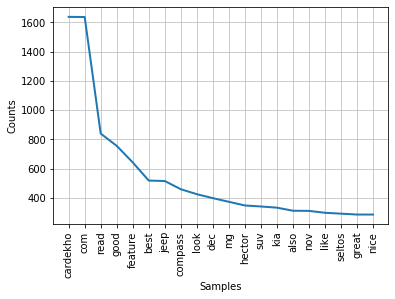

In [144]:
import matplotlib.pyplot as plt
fdist.plot(20 ,cumulative=False)
plt.show()

## Count Vectorizer

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(filtered_sent).toarray()

## TF-IDF

In [81]:
#TF
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

## POS Tagging

In [128]:
#pos tagging
import nltk
nltk.pos_tag(tokenized_sent)

[('{', '('),
 ("'JEEPCompass.csv", "''"),
 ("'", 'POS'),
 (':', ':'),
 ("'review", 'CD'),
 ('text', 'IN'),
 ('review', 'NN'),
 ('date', 'NN'),
 ('star', 'NN'),
 ('rate', 'NN'),
 ('web', 'IN'),
 ('site', 'NN'),
 ('suggest', 'VBP'),
 ('jeep', 'JJ'),
 ('compass', 'NN'),
 ('longitud', 'NN'),
 ('option', 'NN'),
 ('man', 'NN'),
 ('look', 'NN'),
 ('perfect', 'JJ'),
 ('valu', 'NN'),
 ('money', 'NN'),
 ('featur', 'NN'),
 ('compar', 'NN'),
 ('top', 'JJ'),
 ('end', 'NN'),
 ('model', 'NN'),
 ('speed', 'NN'),
 ('automat', 'JJ'),
 ('transmiss', 'JJ'),
 ('read', 'NN'),
 ('may', 'MD'),
 ('cardekho', 'VB'),
 ('com', 'NN'),
 ('car', 'NN'),
 ('omg', 'NN'),
 ('beast', 'NN'),
 ('car', 'NN'),
 ('ultim', 'JJ'),
 ('roarer', 'NN'),
 ('power', 'NN'),
 ('handl', 'NN'),
 ('suspens', 'NNS'),
 ('look', 'VBP'),
 ('bodi', 'JJ'),
 ('total', 'JJ'),
 ('amaz', 'NN'),
 ('beauti', 'NN'),
 ('beast', 'NN'),
 ('best', 'RBS'),
 ('love', 'NN'),
 ('car', 'NN'),
 ('interior', 'JJ'),
 ('amaz', 'RB'),
 ('give', 'VBP'),
 ('feel', 'N

## N - Gram

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [83]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(doc_dict)
X = ngram_vectorizer.transform(doc_dict)
X_test = ngram_vectorizer.transform(doc_dict)

## DTM

In [66]:
#creating a DTM
from sklearn.feature_extraction.text import CountVectorizer
cntVector = CountVectorizer()

dtm_review = pd.DataFrame(cntVector.fit_transform(input_data["Review-Text"]).toarray(),columns=cntVector.get_feature_names(),index = None)
dtm_review.head()

,10,10inch,12,13,17,19,20,2000rpm,2017,2019,...,would,wow,xuv,year,yesterday,yon,you,youngsters,your,yourself
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
